## 🎓 Persona : Léa, jeune investisseuse étudiante

**Profil :**
- 👩 24 ans, diplômée de l'EM Lyon
- 💼 Première expérience professionnelle après 2 ans d'alternance
- 💰 Aide parentale pour le financement + épargne personnelle (~15 000 €)
- 🎯 Objectif : réaliser un **premier investissement locatif** dans une **ville étudiante dynamique**

---

### 💡 Objectif d'investissement
> Trouver le **meilleur investissement locatif étudiant** possible avec un **budget global de 200 000 €**,  
> en analysant la rentabilité brute dans les **principales villes étudiantes françaises** (studios et T1 ≤45m²)

---

### 💰 Hypothèses financières
| Élément | Montant estimé |
|----------|----------------|
| Prix d'achat visé | 160 000 – 180 000 € |
| Apport personnel | 15 000 € |
| Prêt immobilier estimé | 180 000 € sur 20 ans |
| Budget total (frais inclus) | **≈ 200 000 €** |
| Objectif de rentabilité brute | **≥ 5 %** |

---

### 🔍 Besoins data de Léa
- Évaluer le **taux de vacance locative** en France pour anticiper les périodes creuses (notamment l'été où les étudiants quittent les logements)
- Visualiser les **villes à forte concentration étudiante** en France
- Analyser l'**évolution du prix au m² à l'achat et des loyers étudiants** en France
- Etudier **la rentabilité moyenne en France** en 2024
- Analyser la **dynamique du marché immobilier local : croissance ou baisse des prix et loyers sur les 5 dernières années** (entre Rennes et Bordeaux)
- Comparer **les quartiers les plus rentables (rentabilité brute)** à ?
- Analyser la **localisation/nombre des transports en commun** pour identifier les zones les plus attractives pour les étudiants à ?
- Analyser la **localisation des universités/grandes écoles** à ?
- Analyser les **quartiers vivants (nombre de resto, bars, et supermarchés)** à ? 
- Fournir une **recommandation finale : "où investir avec 200k€ ?"**

---

### 🧭 Objectif du notebook
Créer un outil interactif permettant à Léa de :
1. Analyser la **rentabilité locative brute** pour appartements étudiants ≤45m² dans **23 grandes villes françaises**
2. Explorer visuellement les **villes à forte concentration étudiante** et analyser les **taux de vacance locative**
3. Obtenir un **classement des villes** par rentabilité, prix et loyers pour décider où investir avec 200k€

## 📚 Import des bibliothèques ##

In [ ]:
import pandas as pd 
import plotly.express as px
import geopandas as gpd
import requests
import os
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

# 2e vision : Analyse resserrée sur des villes #

### Analyser la **dynamique du marché immobilier local : croissance ou baisse des prix et loyers sur les 5 dernières années** (entre Rennes et Bordeaux) ###

In [ ]:
print("Partie Axel")

### Comparer **les quartiers les plus rentables (rentabilité brute)** à ? ###

In [ ]:
print("Partie Lucien")

### Analyser la **localisation/nombre des transports en commun** pour identifier les zones les plus attractives pour les étudiants à ?  ###

ANALYSE DES IRIS - TRANSPORTS EN COMMUN A RENNES

ETAPE 1 : Chargement des données IRIS
--------------------------------------------------------------------------------
OK - 48512 IRIS géographiques téléchargés
OK - 146 IRIS conservés pour Rennes
OK - Fusion terminée : 146 IRIS avec noms et géométries

ETAPE 2 : Récupération des arrêts de transports depuis OpenStreetMap
--------------------------------------------------------------------------------
Envoi de la requête à l’API Overpass (peut durer 30-60s)...
OK - 1368 arrêts récupérés

ETAPE 3 : Catégorisation des arrêts
--------------------------------------------------------------------------------
OK - 1368 arrêts traités

Répartition par catégorie :
categorie
Bus      1279
Métro      67
Train      22

Exemples d'entrées classées en 'Autre' :
[]

ETAPE 4 : Jointure spatiale (transports x IRIS)
--------------------------------------------------------------------------------
OK - 1365 arrêts associés à un IRIS
     3 arrêts hors IRIS


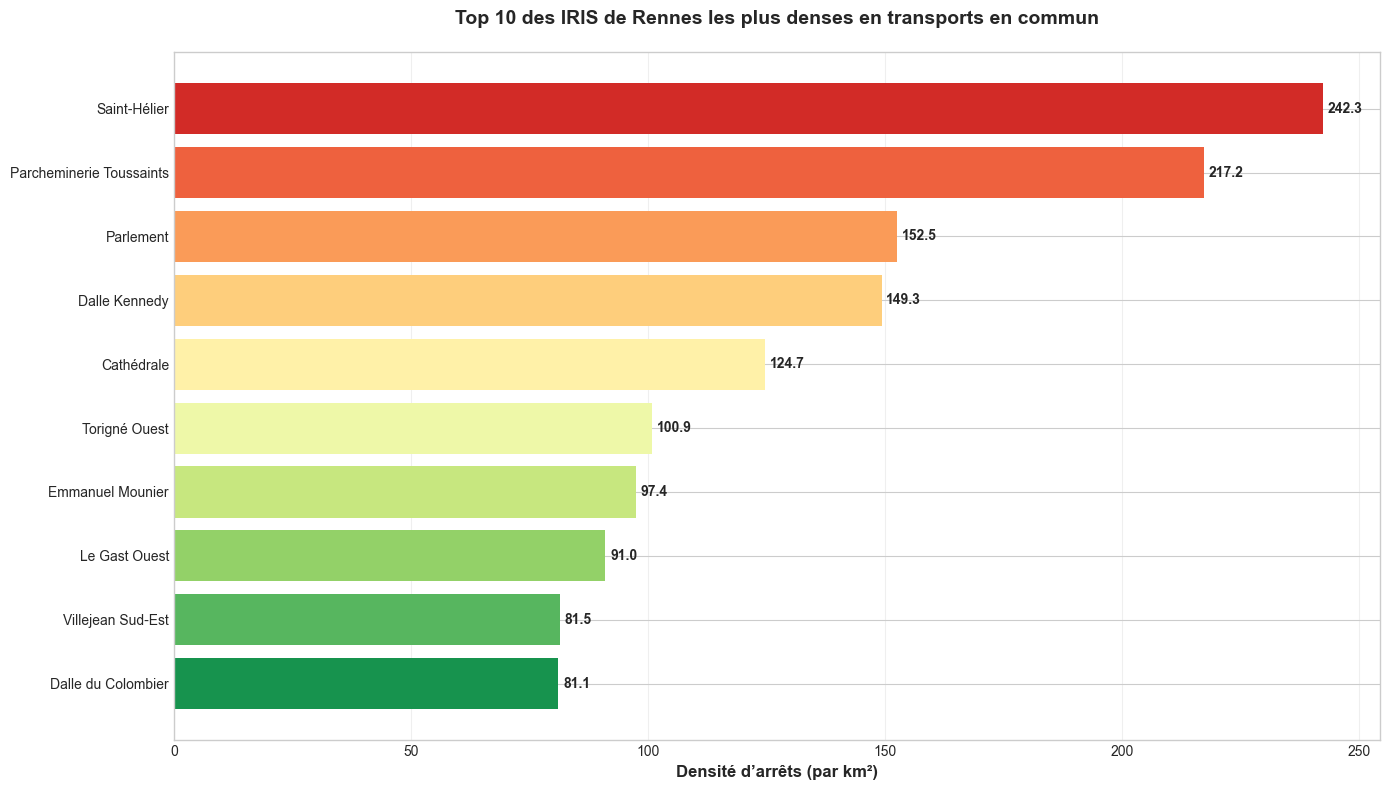

OK - Graphique 1 généré

Création du graphique 2 : Composition par type de transport...


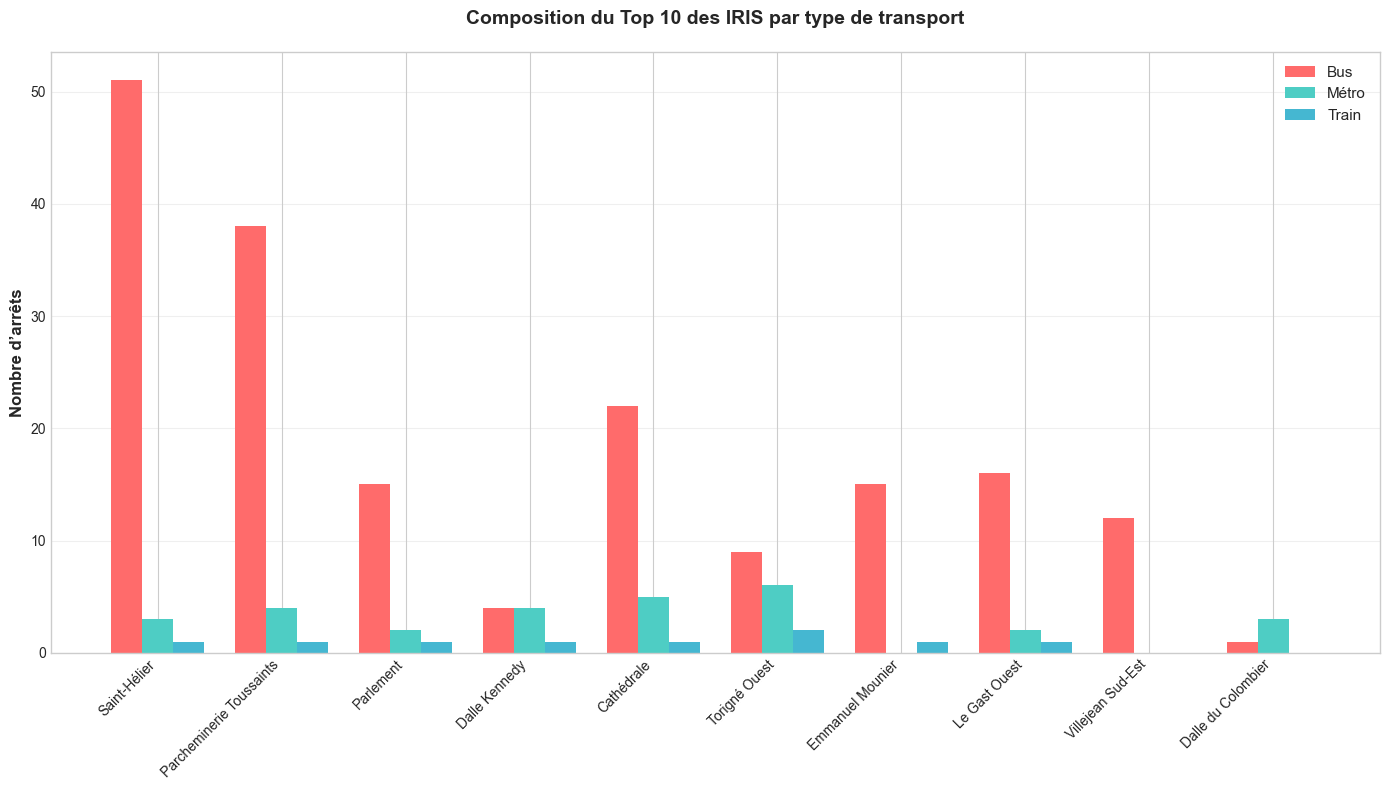

OK - Graphique 2 généré


In [19]:
"""
Analyse des IRIS de Rennes les plus denses en transports en commun
==================================================================
Version robuste (gestion des catégories manquantes et affichage des "Autre")
"""

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import requests
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ANALYSE DES IRIS - TRANSPORTS EN COMMUN A RENNES")
print("=" * 80)

# ============================================================================
# 1. CHARGEMENT DES IRIS
# ============================================================================
print("\nETAPE 1 : Chargement des données IRIS")
print("-" * 80)

url_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/contours-iris-pe.gpkg"
local_path = "contours-iris-pe.gpkg"

if not os.path.exists(local_path):
    print("Téléchargement du fichier...")
    r = requests.get(url_iris)
    with open(local_path, "wb") as f:
        f.write(r.content)

from fiona import listlayers
layers = listlayers(local_path)
iris_start = gpd.read_file(local_path, layer=layers[0])
print(f"OK - {len(iris_start)} IRIS géographiques téléchargés")

# Filtrage sur Rennes
iris_rennes = iris_start[iris_start['nom_commune'].str.contains("Rennes", case=False, na=False)].copy()
print(f"OK - {len(iris_rennes)} IRIS conservés pour Rennes")

# Ajout des noms IRIS
url_ref_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/reference_IRIS_geo2025.xlsx"
iris_noms = pd.read_excel(url_ref_iris).rename(columns={'CODE_IRIS': 'code_iris'})

iris = iris_rennes.merge(iris_noms[['code_iris', 'LIB_IRIS', 'LIBCOM']], 
                         on='code_iris', how='left')
print(f"OK - Fusion terminée : {len(iris)} IRIS avec noms et géométries")

# ============================================================================
# 2. RÉCUPÉRATION DES TRANSPORTS EN COMMUN OSM
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 2 : Récupération des arrêts de transports depuis OpenStreetMap")
print("-" * 80)

overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = """
[out:json][timeout:90];
area["name"="Rennes"]["admin_level"="8"]->.searchArea;
(
  node["public_transport"="stop_position"](area.searchArea);
  node["highway"="bus_stop"](area.searchArea);
  node["railway"="station"](area.searchArea);
  node["railway"="halt"](area.searchArea);
  node["railway"="subway_entrance"](area.searchArea);
);
out center;
"""

print("Envoi de la requête à l’API Overpass (peut durer 30-60s)...")
try:
    response = requests.post(overpass_url, data={"data": overpass_query}, timeout=120)
    response.raise_for_status()
    osm_data = response.json()
    print(f"OK - {len(osm_data['elements'])} arrêts récupérés")
except Exception as e:
    print(f"ERREUR - Impossible de récupérer les données OSM : {e}")
    exit(1)

# ============================================================================
# 3. CATÉGORISATION
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 3 : Catégorisation des arrêts")
print("-" * 80)

transports_list = []

for element in osm_data['elements']:
    tags = element.get('tags', {})
    if element['type'] == 'node':
        lat, lon = element['lat'], element['lon']
    elif 'center' in element:
        lat, lon = element['center']['lat'], element['center']['lon']
    else:
        continue

    # Catégorisation basique
    if 'bus' in tags.get('highway', '') or tags.get('public_transport') == 'stop_position':
        categorie = 'Bus'
    elif 'subway' in tags.get('railway', '') or 'subway' in tags.get('public_transport', ''):
        categorie = 'Métro'
    elif 'station' in tags.get('railway', '') or 'halt' in tags.get('railway', ''):
        categorie = 'Train'
    else:
        categorie = 'Autre'

    transports_list.append({
        'categorie': categorie,
        'latitude': lat,
        'longitude': lon,
        'tags': tags
    })

print(f"OK - {len(transports_list)} arrêts traités")

transports_df = pd.DataFrame(transports_list)
print("\nRépartition par catégorie :")
print(transports_df['categorie'].value_counts().to_string())

# >>> Ajout : affichage de quelques exemples de la catégorie "Autre"
print("\nExemples d'entrées classées en 'Autre' :")
print(transports_df[transports_df['categorie'] == 'Autre'].head(10)['tags'].to_list())


# ============================================================================
# 4. JOINTURE SPATIALE
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 4 : Jointure spatiale (transports x IRIS)")
print("-" * 80)

transports_gdf = gpd.GeoDataFrame(
    transports_df,
    geometry=gpd.points_from_xy(transports_df.longitude, transports_df.latitude),
    crs="EPSG:4326"
).to_crs(iris.crs)

transports_iris = gpd.sjoin(transports_gdf, iris[['code_iris', 'LIB_IRIS', 'geometry']], 
                            how='left', predicate='within')

nb_associes = transports_iris['code_iris'].notna().sum()
print(f"OK - {nb_associes} arrêts associés à un IRIS")
print(f"     {len(transports_iris) - nb_associes} arrêts hors IRIS")

# ============================================================================
# 5. STATISTIQUES PAR IRIS
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 5 : Agrégation et calculs")
print("-" * 80)

stats_iris = transports_iris.groupby('code_iris').size().reset_index(name='total_arrets')

pivot = transports_iris.pivot_table(index='code_iris', columns='categorie', 
                                   aggfunc='size', fill_value=0).reset_index()

stats_iris = iris[['code_iris', 'LIB_IRIS', 'geometry']].merge(stats_iris, on='code_iris', how='left')
stats_iris = stats_iris.merge(pivot, on='code_iris', how='left')

# >>> Correction dynamique des colonnes
for c in ['Bus', 'Métro', 'Train']:
    if c not in stats_iris.columns:
        stats_iris[c] = 0

stats_iris['total_arrets'] = stats_iris['total_arrets'].fillna(0).astype(int)
for c in ['Bus', 'Métro', 'Train']:
    stats_iris[c] = stats_iris[c].fillna(0).astype(int)

print("\nColonnes finales disponibles :", [c for c in ['Bus', 'Métro', 'Train'] if c in stats_iris.columns])

# Calcul des surfaces (Lambert 93)
stats_iris = stats_iris.to_crs(epsg=2154)
stats_iris['surface_km2'] = stats_iris.geometry.area / 1_000_000

# Calcul densité
stats_iris['densite_arrets'] = stats_iris['total_arrets'] / stats_iris['surface_km2']
stats_iris['densite_arrets'] = stats_iris['densite_arrets'].replace([float('inf')], 0).round(1)

print(f"OK - Densités calculées pour {len(stats_iris)} IRIS")

# TOP 10
top10 = stats_iris.nlargest(10, 'densite_arrets')
print("\nTop 10 IRIS les plus denses en transports en commun :")
print(top10[['LIB_IRIS', 'total_arrets', 'densite_arrets']])

# ============================================================================
# 6. GRAPHIQUES
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 6 : Generation des graphiques")
print("-" * 80)
print("Nombre de graphiques a generer : 2")

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================ #
# GRAPHIQUE 1 : TOP 10 CLASSEMENT
# ============================================================================ #
print("\nCréation du graphique 1 : Classement du Top 10...")

fig, ax = plt.subplots(figsize=(14, 8))
top10_sorted = top10.sort_values('densite_arrets', ascending=True)

bars = ax.barh(
    range(len(top10_sorted)),
    top10_sorted['densite_arrets'],
    color=sns.color_palette("RdYlGn_r", len(top10_sorted))
)

labels = [row['LIB_IRIS'][:40] if pd.notna(row['LIB_IRIS']) else 'Sans nom'
          for _, row in top10_sorted.iterrows()]

ax.set_yticks(range(len(top10_sorted)))
ax.set_yticklabels(labels)

for i, (_, row) in enumerate(top10_sorted.iterrows()):
    ax.text(row['densite_arrets'] + 1, i, f"{row['densite_arrets']:.1f}", 
            va='center', fontweight='bold')

ax.set_xlabel('Densité d’arrêts (par km²)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 des IRIS de Rennes les plus denses en transports en commun',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
print("OK - Graphique 1 généré")

# ============================================================================ #
# GRAPHIQUE 2 : COMPOSITION PAR TYPE DE TRANSPORT
# ============================================================================ #
print("\nCréation du graphique 2 : Composition par type de transport...")

fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(top10))
width = 0.25

ax.bar([i - width for i in x], top10['Bus'].values, width, label='Bus', color='#FF6B6B')
ax.bar(x, top10['Métro'].values, width, label='Métro', color='#4ECDC4')
ax.bar([i + width for i in x], top10['Train'].values, width, label='Train', color='#45B7D1')

labels = [row['LIB_IRIS'][:25] if pd.notna(row['LIB_IRIS']) else 'Sans nom'
          for _, row in top10.iterrows()]

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Nombre d’arrêts', fontsize=12, fontweight='bold')
ax.set_title('Composition du Top 10 des IRIS par type de transport',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print("OK - Graphique 2 généré")

### Analyser la **concentration/localisation des étudiants dans le supérieur** à Rennes/Bordeaux ###

In [ ]:
url_df_enseignement_sup = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/fr-esr-atlas_regional-effectifs-d-etudiants-inscrits-detail_etablissements.csv"

df_enseignement_sup = pd.read_csv(url_df_enseignement_sup, delimiter=';')

df_enseignement_sup.head()

In [ ]:
df_rennes = df_enseignement_sup[df_enseignement_sup['Commune'] == 'Rennes']

print(f"Nombre de lignes à Rennes :", df_rennes.shape[0])
print(f"Nombres de lignes avec gps à Rennes :", (df_rennes['gps'].isnull() == False).sum())
print(f"Nombres de lignes sans gps à Rennes avant drop:", df_rennes['gps'].isnull().sum())

df_rennes = df_rennes.dropna(subset=['gps'])

print(f"Nombres de lignes sans gps à Rennes après drop:", df_rennes['gps'].isnull().sum())
df_rennes.head()

In [ ]:
# Nettoyage des coordonnées
df_rennes[['lat', 'lon']] = df_rennes['gps'].str.split(',', expand=True)
df_rennes['lat'] = df_rennes['lat'].astype(float)
df_rennes['lon'] = df_rennes['lon'].astype(float)

print(f"Nombre de lignes à Rennes :", df_rennes[['lat', 'lon']].shape[0])
print(f"Nombres de lignes avec lat et lon à Rennes :", ((df_rennes['lat'].isnull() == False) & (df_rennes['lon'].isnull() == False)).sum())
print(f"Nombres de lignes sans lat et lon à Rennes avant drop:", ((df_rennes['lat'].isnull()) & (df_rennes['lon'].isnull())).sum())

# On enlève les lignes sans coordonnées
df_rennes = df_rennes.dropna(subset=['lat', 'lon'])

print(f"Nombres de lignes sans lat et lon à Rennes après drop:", ((df_rennes['lat'].isnull()) & (df_rennes['lon'].isnull())).sum())

In [ ]:
# Transformation en GeoDataFrame 
df_rennes = gpd.GeoDataFrame(
    df_rennes,
    geometry=gpd.points_from_xy(df_rennes.lon, df_rennes.lat),
    crs="EPSG:4326"  # WGS84
)

In [ ]:
df_bordeaux = df_enseignement_sup[df_enseignement_sup['Commune'] == 'Bordeaux']

print(f"Nombre de lignes à Bordeaux :", df_bordeaux.shape[0])
print(f"Nombres de lignes avec gps à Bordeaux :", (df_bordeaux['gps'].isnull() == False).sum())
print(f"Nombres de lignes sans gps à Bordeaux avant drop:", df_bordeaux['gps'].isnull().sum())

df_bordeaux = df_bordeaux.dropna(subset=['gps'])

print(f"Nombres de lignes sans gps à Bordeaux après drop:", df_bordeaux['gps'].isnull().sum())
df_bordeaux.head()

In [ ]:
# Nettoyage des coordonnées
df_bordeaux[['lat', 'lon']] = df_bordeaux['gps'].str.split(',', expand=True)
df_bordeaux['lat'] = df_bordeaux['lat'].astype(float)
df_bordeaux['lon'] = df_bordeaux['lon'].astype(float)

print(f"Nombre de lignes à Bordeaux :", df_bordeaux[['lat', 'lon']].shape[0])
print(f"Nombres de lignes avec lat et lon à Bordeaux :", ((df_bordeaux['lat'].isnull() == False) & (df_bordeaux['lon'].isnull() == False)).sum())
print(f"Nombres de lignes sans lat et lon à Bordeaux avant drop:", ((df_bordeaux['lat'].isnull()) & (df_bordeaux['lon'].isnull())).sum())

# On enlève les lignes sans coordonnées
df_bordeaux = df_bordeaux.dropna(subset=['lat', 'lon'])

print(f"Nombres de lignes sans lat et lon à Bordeaux après drop:", ((df_bordeaux['lat'].isnull()) & (df_bordeaux['lon'].isnull())).sum())

In [ ]:
# Transformation en GeoDataFrame 
df_bordeaux = gpd.GeoDataFrame(
    df_bordeaux,
    geometry=gpd.points_from_xy(df_bordeaux.lon, df_bordeaux.lat),
    crs="EPSG:4326"  # WGS84
)

In [ ]:
url_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/contours-iris-pe.gpkg"
local_path = "contours-iris-pe.gpkg"

# Télécharger une seule fois
if not os.path.exists(local_path):
    print("Téléchargement du fichier...")
    r = requests.get(url_iris)
    with open(local_path, "wb") as f:
        f.write(r.content)

# Lister les couches avec fiona
from fiona import listlayers
layers = listlayers(local_path)
print("Couches disponibles:", layers)

# Charger la couche principale
iris = gpd.read_file(local_path, layer=layers[0])
iris.head()


In [ ]:
url_ref_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/reference_IRIS_geo2025.xlsx"

iris_noms = pd.read_excel(url_ref_iris)

iris_noms = iris_noms.rename(columns={'CODE_IRIS': 'code_iris'})

# fusion avec ton GeoDataFrame (qui contient les codes IRIS)
iris = iris.merge(iris_noms[['code_iris', 'LIB_IRIS', 'LIBCOM']], on='code_iris', how='left')

iris.head()


In [ ]:
# Filtrer
iris_rennes = iris[iris['nom_commune'].str.contains("Rennes", case=False, na=False)].copy()

print(f"Rennes contient", len(iris_rennes), "IRIS")

iris_rennes.head()

In [ ]:
# On met tout dans la même CRS projetée (ex: EPSG:2154 ou utiliser EPSG:4326 par la suite)
iris_rennes = iris_rennes.to_crs(epsg=4326)
df_rennes = df_rennes.to_crs(epsg=4326)


In [ ]:
# spatial join : chaque établissement rattaché à un IRIS
etabs_par_iris_rennes = gpd.sjoin(df_rennes, iris_rennes, how="inner", predicate="within")
etabs_par_iris_rennes.head()

In [ ]:
iris_rennes_stats = iris_rennes.copy()

# Nombre d'établissements
iris_rennes_stats = iris_rennes_stats.merge(
    etabs_par_iris_rennes.groupby('LIB_IRIS').size().reset_index(name='nb_etabs'),
    on='LIB_IRIS', how='left'
).fillna({'nb_etabs':0})
iris_rennes_stats['nb_etabs'] = iris_rennes_stats['nb_etabs'].astype(int)

# Nombre total d'étudiants
iris_rennes_stats = iris_rennes_stats.merge(
    etabs_par_iris_rennes.groupby('LIB_IRIS')['nombre total d’étudiants inscrits hors doubles inscriptions université/CPGE'].sum().reset_index(name='nb_etudiants'),
    on='LIB_IRIS', how='left'
).fillna({'nb_etudiants':0})
iris_rennes_stats['nb_etudiants'] = iris_rennes_stats['nb_etudiants'].astype(int)

iris_rennes_stats = iris_rennes_stats.to_crs(epsg=2154)  # crs projetée pour calculer surface en m²
iris_rennes_stats['area_m2'] = iris_rennes_stats.geometry.area
iris_rennes_stats['etabs_per_m2'] = iris_rennes_stats['nb_etabs'] / iris_rennes_stats['area_m2']
iris_rennes_stats['students_per_m2'] = iris_rennes_stats['nb_etudiants'] / iris_rennes_stats['area_m2']

In [ ]:
# reconvertir en 4326
iris_plot = iris_rennes_stats.to_crs(epsg=4326)

colorscale = "YlOrRd"  # jaune = faible, rouge = élevé

# Carte initiale avec coloraxis défini
fig = px.choropleth_mapbox(
    iris_plot,
    geojson=iris_plot.__geo_interface__,
    locations=iris_plot.index,
    color='students_per_m2',  # initial color
    hover_name='LIB_IRIS',
    hover_data=['nb_etabs','area_m2','nb_etudiants'],
    mapbox_style="carto-positron",
    center={"lat":48.117, "lon":-1.677},
    zoom=12,
    opacity=0.6,
)

# On associe explicitement la trace à coloraxis et fixe les limites
fig.update_traces(
    coloraxis="coloraxis"
)

# Définition globale de coloraxis
fig.update_layout(
    coloraxis=dict(
        colorscale=colorscale,
        cmin=iris_plot['students_per_m2'].min(),
        cmax=iris_plot['students_per_m2'].max(),
        colorbar=dict(title="Étudiants/m²")
    )
)

# Points établissements
fig.add_scattermapbox(
    lat=df_rennes['lat'],
    lon=df_rennes['lon'],
    mode='markers',
    marker=dict(size=6, color='blue'),
    text=etabs_par_iris_rennes["libellé de l'établissement"],
    name='Établissements OSM'
)

# Boutons interactifs : on ne touche qu'à z, zmin, zmax
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=0.0, y=1.05, showactive=True,
            buttons=[
                dict(
                    label="Densité",
                    method="update",
                    args=[
                        {"z": [iris_plot['students_per_m2']]},
                        {"coloraxis.cmin": iris_plot['students_per_m2'].min(),
                         "coloraxis.cmax": iris_plot['students_per_m2'].max(),
                         "coloraxis.colorbar.title": "Étudiants/m²"}
                    ]
                ),
                dict(
                    label="Nombre d'étudiants",
                    method="update",
                    args=[  
                        {"z": [iris_plot['nb_etudiants']]},
                        {"coloraxis.cmin": iris_plot['nb_etudiants'].min(),
                         "coloraxis.cmax": iris_plot['nb_etudiants'].max(),
                         "coloraxis.colorbar.title": "Nombre d'étudiants"}
                    ]
                ),
            ]
        )
    ]
)

fig.update_layout(margin={"r":0,"t":75,"l":0,"b":0}, title="Étudiants sup. par IRIS - Rennes")
fig.show()


In [ ]:
colorscale = "YlOrRd"

def make_fig(mode="Densité", top_n=10):
    """
    Génère un graphique en fonction :
    - du mode sélectionné ('Densité' ou 'Nombre d’étudiants')
    - du nombre de top IRIS à afficher
    """
    if mode == "Densité":
        data = iris_rennes_stats.sort_values(by='students_per_m2', ascending=False).head(top_n)
        y_col = "students_per_m2"
        title = f"Top {top_n} IRIS les plus denses en étudiants - Rennes"
        color_title = "Étudiants/m²"
    else:
        data = iris_rennes_stats.sort_values(by='nb_etudiants', ascending=False).head(top_n)
        y_col = "nb_etudiants"
        title = f"Top {top_n} IRIS par nombre total d'étudiants - Rennes"
        color_title = "Nombre d'étudiants"

    fig = px.bar(
        data,
        x='LIB_IRIS',
        y=y_col,
        color=y_col,
        hover_data=['nb_etudiants', 'area_m2', 'nb_etabs'],
        color_continuous_scale=colorscale,
        title=title
    )

    fig.update_layout(
        xaxis_title="Quartier (IRIS)",
        yaxis_title=color_title,
        coloraxis_colorbar=dict(title=color_title),
        margin=dict(t=60, l=50, r=50, b=50)
    )
    fig.show()


# Widgets
mode_selector = widgets.ToggleButtons(
    options=['Densité', 'Nombre d\'étudiants'],
    description='Afficher :',
    button_style='info',
    style={'description_width': 'initial'}
)

top_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=30,
    step=1,
    description='Top N IRIS :',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Liaison interactive
interactive_plot = interactive(make_fig, mode=mode_selector, top_n=top_slider)
display(interactive_plot)


In [ ]:
# Filtrer
iris_bordeaux = iris[iris['nom_commune'].str.contains("Bordeaux", case=False, na=False)].copy()

print(f"Bordeaux contient", len(iris_bordeaux), "IRIS")

iris_bordeaux.head()

In [ ]:
# On met tout dans la même CRS projetée (ex: EPSG:2154 ou utiliser EPSG:4326 par la suite)
iris_bordeaux = iris_bordeaux.to_crs(epsg=4326)
df_bordeaux = df_bordeaux.to_crs(epsg=4326)


In [ ]:
# spatial join : chaque établissement rattaché à un IRIS
etabs_par_iris_bordeaux = gpd.sjoin(df_bordeaux, iris_bordeaux, how="inner", predicate="within")
etabs_par_iris_bordeaux.head()

In [ ]:
iris_bordeaux_stats = iris_bordeaux.copy()

# Nombre d'établissements
iris_bordeaux_stats = iris_bordeaux_stats.merge(
    etabs_par_iris_bordeaux.groupby('LIB_IRIS').size().reset_index(name='nb_etabs'),
    on='LIB_IRIS', how='left'
).fillna({'nb_etabs':0})
iris_bordeaux_stats['nb_etabs'] = iris_bordeaux_stats['nb_etabs'].astype(int)

# Nombre total d'étudiants
iris_bordeaux_stats = iris_bordeaux_stats.merge(
    etabs_par_iris_bordeaux.groupby('LIB_IRIS')['nombre total d’étudiants inscrits hors doubles inscriptions université/CPGE'].sum().reset_index(name='nb_etudiants'),
    on='LIB_IRIS', how='left'
).fillna({'nb_etudiants':0})
iris_bordeaux_stats['nb_etudiants'] = iris_bordeaux_stats['nb_etudiants'].astype(int)

iris_bordeaux_stats = iris_bordeaux_stats.to_crs(epsg=2154)  # crs projetée pour calculer surface en m²
iris_bordeaux_stats['area_m2'] = iris_bordeaux_stats.geometry.area
iris_bordeaux_stats['etabs_per_m2'] = iris_bordeaux_stats['nb_etabs'] / iris_bordeaux_stats['area_m2']
iris_bordeaux_stats['students_per_m2'] = iris_bordeaux_stats['nb_etudiants'] / iris_bordeaux_stats['area_m2']



In [ ]:
# reconvertir en 4326
iris_plot = iris_bordeaux_stats.to_crs(epsg=4326)

colorscale = "YlOrRd"  # jaune = faible, rouge = élevé

# Carte initiale avec coloraxis défini
fig = px.choropleth_mapbox(
    iris_plot,
    geojson=iris_plot.__geo_interface__,
    locations=iris_plot.index,
    color='students_per_m2',  # initial color
    hover_name='LIB_IRIS',
    hover_data=['nb_etabs','area_m2','nb_etudiants'],
    mapbox_style="carto-positron",
    center={"lat":44.8378, "lon":-0.5792},
    zoom=12,
    opacity=0.6,
)

# On associe explicitement la trace à coloraxis et fixe les limites
fig.update_traces(
    coloraxis="coloraxis"
)

# Définition globale de coloraxis
fig.update_layout(
    coloraxis=dict(
        colorscale=colorscale,
        cmin=iris_plot['students_per_m2'].min(),
        cmax=iris_plot['students_per_m2'].max(),
        colorbar=dict(title="Étudiants/m²")
    )
)

# Points établissements
fig.add_scattermapbox(
    lat=df_bordeaux['lat'],
    lon=df_bordeaux['lon'],
    mode='markers',
    marker=dict(size=6, color='blue'),
    text=etabs_par_iris_bordeaux["libellé de l'établissement"],
    name='Établissements OSM'
)

# Boutons interactifs : on ne touche qu'à z, zmin, zmax
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=0.0, y=1.05, showactive=True,
            buttons=[
                dict(
                    label="Densité",
                    method="update",
                    args=[
                        {"z": [iris_plot['students_per_m2']]},
                        {"coloraxis.cmin": iris_plot['students_per_m2'].min(),
                         "coloraxis.cmax": iris_plot['students_per_m2'].max(),
                         "coloraxis.colorbar.title": "Étudiants/m²"}
                    ]
                ),
                dict(
                    label="Nombre d'étudiants",
                    method="update",
                    args=[
                        {"z": [iris_plot['nb_etudiants']]},
                        {"coloraxis.cmin": iris_plot['nb_etudiants'].min(),
                         "coloraxis.cmax": iris_plot['nb_etudiants'].max(),
                         "coloraxis.colorbar.title": "Nombre d'étudiants"}
                    ]
                ),
            ]
        )
    ]
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title="Étudiants sup. par IRIS - Bordeaux")
fig.show()


In [ ]:
colorscale = "YlOrRd"  # jaune = faible, rouge = élevé

# Top 10 IRIS par densité (par défaut)
top10_density_bordeaux = iris_bordeaux_stats.sort_values(by='students_per_m2', ascending=False).head(10)

# Top 10 IRIS par nombre d'étudiants
top10_students_bordeaux = iris_bordeaux_stats.sort_values(by='nb_etudiants', ascending=False).head(10)

# Carte initiale avec coloraxis défini
fig = px.bar(
    top10_density_bordeaux,
    x='LIB_IRIS',
    y='students_per_m2',
    color='students_per_m2',
    hover_data=['nb_etudiants','area_m2','nb_etabs'],
    color_continuous_scale=colorscale,
    title="Top 10 IRIS les plus denses en étudiants - Bordeaux"
)

# On associe explicitement la trace à coloraxis et fixe les limites
fig.update_traces(marker_coloraxis="coloraxis")

# Définition globale de coloraxis
fig.update_layout(
    coloraxis=dict(
        colorscale=colorscale,
        reversescale=False,  # rouge = élevé, jaune = faible
        cmin=top10_density['students_per_m2'].min(),
        cmax=top10_density['students_per_m2'].max(),
        colorbar=dict(title="Étudiants/m²")
    )
)

# Boutons interactifs : on ne touche qu'à x, y, marker.color et coloraxis
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            x=0.0, y=1.05, showactive=True,
            buttons=[
                dict(
                    label="Densité",
                    method="update",
                    args=[
                        {"x": [top10_density_bordeaux['LIB_IRIS']],
                         "y": [top10_density_bordeaux['students_per_m2']],
                         "marker.color": [top10_density_bordeaux['students_per_m2']]},
                        {"coloraxis.cmin": top10_density_bordeaux['students_per_m2'].min(),
                         "coloraxis.cmax": top10_density_bordeaux['students_per_m2'].max(),
                         "coloraxis.colorbar.title": "Étudiants/m²",
                         "yaxis.title": "Étudiants / m²"}
                    ]
                ),
                dict(
                    label="Nombre d'étudiants",
                    method="update",
                    args=[
                        {"x": [top10_students_bordeaux['LIB_IRIS']],
                         "y": [top10_students_bordeaux['nb_etudiants']],
                         "marker.color": [top10_students_bordeaux['nb_etudiants']]},
                        {"coloraxis.cmin": top10_students_bordeaux['nb_etudiants'].min(),
                         "coloraxis.cmax": top10_students_bordeaux['nb_etudiants'].max(),
                         "coloraxis.colorbar.title": "Nombre d'étudiants",
                         "yaxis.title": "Nombre d'étudiants"}
                    ]
                ),
            ]
        )
    ]
)

fig.update_layout(xaxis_title="Quartier (IRIS)", yaxis_title="Étudiants / m²")
fig.show()


### Analyser les **quartiers vivants (nombre de resto, bars, et supermarchés)** à ? ###

In [ ]:
print("Partie Adam et Valentine")

In [ ]:
"""
Analyse des IRIS de Rennes les plus denses en commerces vivants
================================================================
Version legere : affichage direct des graphiques sans sauvegarde
"""

import os
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ANALYSE DES IRIS - COMMERCES VIVANTS A RENNES")
print("=" * 80)

# ============================================================================
# 1. CHARGEMENT DES IRIS
# ============================================================================
print("\nETAPE 1 : Chargement des donnees IRIS")
print("-" * 80)



url_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/contours-iris-pe.gpkg"
local_path = "contours-iris-pe.gpkg"
# Télécharger une seule fois
if not os.path.exists(local_path):
    print("Téléchargement du fichier...")
    r = requests.get(url_iris)
    with open(local_path, "wb") as f:
        f.write(r.content)
# Lister les couches avec fiona
from fiona import listlayers
layers = listlayers(local_path)
print("Couches disponibles:", layers)
# Charger la couche principale
iris_start = gpd.read_file(local_path, layer=layers[0])
iris_start.head()
print(f"OK - {len(iris_start)} IRIS geographiques telecharges")

print("Telechargement de la base de reference IRIS depuis HuggingFace...")
url_ref_iris = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/reference_IRIS_geo2025.xlsx"
iris_noms = pd.read_excel(url_ref_iris)
iris_noms = iris_noms.rename(columns={'CODE_IRIS': 'code_iris'})
print(f"OK - {len(iris_noms)} IRIS charges dans la base nationale")

print("\nFiltrage sur la commune de Rennes (code INSEE 35238)...")
iris_rennes = iris_start[iris_start['nom_commune'].str.contains("Rennes", case=False, na=False)].copy()
print(f"OK - {len(iris_rennes)} IRIS conserves pour Rennes")

print("\nFusion des noms avec les geometries...")
iris = iris_rennes.merge(iris_noms[['code_iris', 'LIB_IRIS', 'LIBCOM']], 
                         on='code_iris', how='left')
print(f"OK - Fusion terminee : {len(iris)} IRIS avec noms et geometries")

# ============================================================================
# 2. RÉCUPÉRATION DES COMMERCES OSM
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 2 : Recuperation des commerces depuis OpenStreetMap")
print("-" * 80)

overpass_url = "http://overpass-api.de/api/interpreter"

print("Construction de la requete Overpass API...")
print("Types de commerces recherches :")
print("  - Restaurants et fast-foods")
print("  - Bars, pubs et cafes")
print("  - Supermarches et epiceries")

overpass_query = """
[out:json][timeout:90];
area["name"="Rennes"]["admin_level"="8"]->.searchArea;
(
  node["amenity"="restaurant"](area.searchArea);
  way["amenity"="restaurant"](area.searchArea);
  node["amenity"="fast_food"](area.searchArea);
  way["amenity"="fast_food"](area.searchArea);
  node["amenity"="bar"](area.searchArea);
  way["amenity"="bar"](area.searchArea);
  node["amenity"="pub"](area.searchArea);
  way["amenity"="pub"](area.searchArea);
  node["amenity"="cafe"](area.searchArea);
  way["amenity"="cafe"](area.searchArea);
  node["shop"="supermarket"](area.searchArea);
  way["shop"="supermarket"](area.searchArea);
  node["shop"="convenience"](area.searchArea);
  way["shop"="convenience"](area.searchArea);
  node["shop"="grocery"](area.searchArea);
  way["shop"="grocery"](area.searchArea);
);
out center;
"""

print("\nEnvoi de la requete a l'API Overpass...")
print("(Cette etape peut prendre 30-60 secondes)")

try:
    response = requests.post(overpass_url, data={"data": overpass_query}, timeout=120)
    response.raise_for_status()
    osm_data = response.json()
    print(f"OK - {len(osm_data['elements'])} commerces recuperes")
except Exception as e:
    print(f"ERREUR - Impossible de recuperer les donnees OSM : {e}")
    exit(1)

# ============================================================================
# 3. CONVERSION ET CATÉGORISATION
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 3 : Conversion et categorisation des commerces")
print("-" * 80)

commerces_list = []

print("Traitement des elements OpenStreetMap...")
for element in osm_data['elements']:
    tags = element.get('tags', {})
    
    # Extraction coordonnees
    if element['type'] == 'node':
        lat, lon = element['lat'], element['lon']
    elif 'center' in element:
        lat, lon = element['center']['lat'], element['center']['lon']
    else:
        continue
    
    # Categorisation
    amenity = tags.get('amenity', '')
    shop = tags.get('shop', '')
    
    if amenity in ['restaurant', 'fast_food']:
        categorie = 'Restaurant'
    elif amenity in ['bar', 'pub', 'cafe']:
        categorie = 'Bar/Café'
    elif shop in ['supermarket', 'convenience', 'grocery']:
        categorie = 'Supermarché'
    else:
        categorie = 'Autre'
    
    commerces_list.append({
        'categorie': categorie,
        'latitude': lat,
        'longitude': lon
    })

print(f"OK - {len(commerces_list)} commerces traites")

print("\nCreation du GeoDataFrame avec les coordonnees...")
commerces_df = pd.DataFrame(commerces_list)
commerces_gdf = gpd.GeoDataFrame(
    commerces_df,
    geometry=gpd.points_from_xy(commerces_df.longitude, commerces_df.latitude),
    crs="EPSG:4326"
)

print("Reprojection dans le systeme de coordonnees des IRIS...")
commerces_gdf = commerces_gdf.to_crs(iris.crs)
print(f"OK - {len(commerces_gdf)} commerces geolocalises")

print("\nRepartition par categorie :")
print(commerces_gdf['categorie'].value_counts().to_string())

# ============================================================================
# 4. JOINTURE SPATIALE
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 4 : Jointure spatiale (commerces x IRIS)")
print("-" * 80)

print("Association de chaque commerce a son IRIS...")
commerces_iris = gpd.sjoin(commerces_gdf, iris[['code_iris', 'LIB_IRIS', 'geometry']], 
                            how='left', predicate='within')

nb_associes = commerces_iris['code_iris'].notna().sum()
print(f"OK - {nb_associes} commerces associes a un IRIS")
print(f"     {len(commerces_iris) - nb_associes} commerces hors IRIS")

print("\nComptage du nombre de commerces par IRIS...")
stats_iris = commerces_iris.groupby('code_iris').size().reset_index(name='total_commerces')
print(f"OK - {len(stats_iris)} IRIS contiennent au moins 1 commerce")

print("\nComptage par categorie de commerce...")
pivot = commerces_iris.pivot_table(index='code_iris', columns='categorie', 
                                   aggfunc='size', fill_value=0).reset_index()
print(f"OK - Tableau croise cree")

print("\nFusion avec les informations des IRIS...")
stats_iris = stats_iris.merge(pivot, on='code_iris', how='left')
stats_iris = iris[['code_iris', 'LIB_IRIS', 'geometry']].merge(stats_iris, on='code_iris', how='left')

print("Remplissage des valeurs manquantes par 0...")
for col in ['total_commerces', 'Restaurant', 'Bar/Café', 'Supermarché']:
    if col in stats_iris.columns:
        stats_iris[col] = stats_iris[col].fillna(0).astype(int)
    else:
        stats_iris[col] = 0

print(f"OK - Table finale : {len(stats_iris)} IRIS avec statistiques")

print("\nCalcul de la surface de chaque IRIS...")
print("Reprojection en Lambert 93 (systeme metrique francais)...")
stats_iris = gpd.GeoDataFrame(stats_iris, geometry='geometry', crs=iris.crs)

# Reprojeter en Lambert 93 (EPSG:2154) pour avoir des surfaces en mètres
stats_iris_projected = stats_iris.to_crs(epsg=2154)
stats_iris['surface_km2'] = stats_iris_projected.geometry.area / 1_000_000

print(f"OK - Surfaces calculees (min: {stats_iris['surface_km2'].min():.3f} km², max: {stats_iris['surface_km2'].max():.3f} km²)")

# Vérification
if stats_iris['surface_km2'].max() == 0:
    print("ATTENTION - Probleme de calcul de surface, utilisation de la geometrie originale...")
    stats_iris['surface_km2'] = stats_iris.geometry.area / 1_000_000
    print(f"OK - Surfaces recalculees (min: {stats_iris['surface_km2'].min():.6f} km², max: {stats_iris['surface_km2'].max():.3f} km²)")


print("\nCalcul du score de densite pondere...")

print("\nCalcul du score de densite pondere...")
print("Formule : (Restaurants x 2 + Bars/Cafes x 2 + Supermarches x 1.5) / surface_km2")

stats_iris['score_densite'] = (
    stats_iris['Restaurant'] * 2.0 +
    stats_iris['Bar/Café'] * 2.0 +
    stats_iris['Supermarché'] * 1.5
) / stats_iris['surface_km2']

stats_iris['score_densite'] = stats_iris['score_densite'].replace([float('inf')], 0).round(1)
print(f"OK - Scores calcules pour tous les IRIS")

# ============================================================================
# 5. TOP 10
# ============================================================================
print("\n" + "=" * 80)
print("TOP 10 DES IRIS LES PLUS DENSES EN COMMERCES VIVANTS")
print("=" * 80)
print("\nCalcul de la densite pour chaque IRIS...")
print("Formule : (Restaurants x2 + Bars x2 + Supermarches x1.5) / surface")

iris_valides = stats_iris[(stats_iris['total_commerces'] > 0) & (stats_iris['surface_km2'] > 0)]
top10 = iris_valides.nlargest(10, 'score_densite')

print(f"\nRESULTAT : {len(iris_valides)} IRIS contiennent au moins 1 commerce")
print("\n" + "=" * 80)

print(f"\n{'Rang':<6} {'IRIS':<45} {'Restos':<8} {'Bars':<8} {'Supers':<8} {'Total':<8}")
print("-" * 85)

for idx, (_, row) in enumerate(top10.iterrows(), 1):
    nom = row['LIB_IRIS'] if pd.notna(row['LIB_IRIS']) else 'Sans nom'
    nom = nom[:43]
    print(f"{idx:<6} {nom:<45} {int(row['Restaurant']):<8} {int(row['Bar/Café']):<8} "
          f"{int(row['Supermarché']):<8} {int(row['total_commerces']):<8}")

print("\n" + "=" * 80)
print(f"STATISTIQUES GLOBALES")
print("=" * 80)
print(f"IRIS total a Rennes : {len(iris)}")
print(f"IRIS avec commerces : {len(iris_valides)}")
print(f"IRIS sans commerce : {len(iris) - len(iris_valides)}")
print(f"\nTotal restaurants : {int(stats_iris['Restaurant'].sum())}")
print(f"Total bars/cafes : {int(stats_iris['Bar/Café'].sum())}")
print(f"Total supermarches : {int(stats_iris['Supermarché'].sum())}")
print("=" * 80)

# ============================================================================
# 6. GRAPHIQUES
# ============================================================================
print("\n" + "=" * 80)
print("ETAPE 5 : Generation des graphiques")
print("-" * 80)
print("Nombre de graphiques a generer : 2")

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# GRAPHIQUE 1 : TOP 10 CLASSEMENT
# ============================================================================
print("\nCreation du graphique 1 : Classement du Top 10...")

fig, ax = plt.subplots(figsize=(14, 8))

top10_sorted = top10.sort_values('score_densite', ascending=True)

bars = ax.barh(
    range(len(top10_sorted)),
    top10_sorted['total_commerces'],
    color=sns.color_palette("RdYlGn_r", len(top10_sorted))
)

labels = [row['LIB_IRIS'][:40] if pd.notna(row['LIB_IRIS']) else 'Sans nom' 
          for _, row in top10_sorted.iterrows()]

ax.set_yticks(range(len(top10_sorted)))
ax.set_yticklabels(labels)

for i, (_, row) in enumerate(top10_sorted.iterrows()):
    ax.text(row['total_commerces'] + 1, i, f"{int(row['total_commerces'])}", 
            va='center', fontweight='bold')

ax.set_xlabel('Nombre de commerces', fontsize=12, fontweight='bold')
ax.set_title('Top 10 des IRIS de Rennes les plus denses en commerces vivants',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
print("OK - Graphique 1 genere")
plt.show()

# ============================================================================
# GRAPHIQUE 2 : COMPOSITION
# ============================================================================
print("\nCreation du graphique 2 : Composition par type de commerce...")

fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(top10))
width = 0.25

ax.bar([i - width for i in x], top10['Restaurant'].values, width, 
       label='Restaurants', color='#FF6B6B')
ax.bar(x, top10['Bar/Café'].values, width, 
       label='Bars/Cafes', color='#4ECDC4')
ax.bar([i + width for i in x], top10['Supermarché'].values, width, 
       label='Supermarches', color='#45B7D1')

labels = [row['LIB_IRIS'][:25] if pd.notna(row['LIB_IRIS']) else 'Sans nom' 
          for _, row in top10.iterrows()]

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Nombre de commerces', fontsize=12, fontweight='bold')
ax.set_title('Composition du Top 10 des IRIS par type de commerce',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
print("OK - Graphique 2 genere")
plt.show()